In [1]:
# !pip install pydub
# !pip install scipy

https://apmonitor.com/dde/index.php/Main/AudioAnalysis


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join, basename
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment

In [4]:
audio_path = '../data/wav_corpus/'
audio_files = [join(audio_path, f) for f in listdir(
    audio_path) if isfile(join(audio_path, f))]
print(audio_files)

['../data/wav_corpus/f_ans001aen.wav', '../data/wav_corpus/f_ans001aes.wav', '../data/wav_corpus/f_ans001ait.wav', '../data/wav_corpus/f_ans002aes.wav', '../data/wav_corpus/f_ans002ait.wav', '../data/wav_corpus/f_ans003aen.wav', '../data/wav_corpus/f_ans003aes.wav', '../data/wav_corpus/f_ans004aen.wav', '../data/wav_corpus/f_ans004aes.wav', '../data/wav_corpus/f_ans004ait.wav', '../data/wav_corpus/f_ans005aen.wav', '../data/wav_corpus/f_ans005ait.wav', '../data/wav_corpus/f_ans007aes.wav', '../data/wav_corpus/f_ans007sen.wav', '../data/wav_corpus/f_ans009aes.wav', '../data/wav_corpus/f_ans009ait.wav', '../data/wav_corpus/f_ans009ben.wav', '../data/wav_corpus/f_ans009bes.wav', '../data/wav_corpus/f_ans009bit.wav', '../data/wav_corpus/f_ans010aen.wav', '../data/wav_corpus/f_ans010aes.wav', '../data/wav_corpus/f_ans010bes.wav', '../data/wav_corpus/f_ans010bit.wav', '../data/wav_corpus/f_ans012aen.wav', '../data/wav_corpus/f_ans012aes.wav', '../data/wav_corpus/f_ans012ait.wav', '../data/wa

In [13]:
f = audio_files[0]
f

'../data/wav_corpus/f_ans001aen.wav'

In [14]:
# s = sampling (int)
# a = audio signal (numpy array)
s, a = wavfile.read(f)
print('Sampling Rate:', s)
print('Audio Shape:', np.shape(a))

Sampling Rate: 44100
Audio Shape: (97020,)


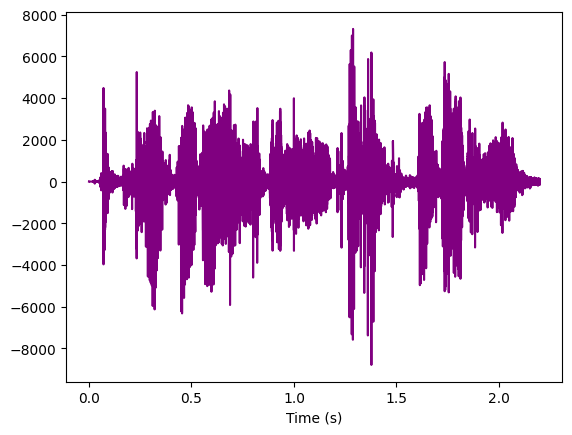

In [24]:
# number of samples
na = a.shape[0]
# audio time duration
la = na / s

# plot signal versus time
t = np.linspace(0, la, na)
plt.plot(t, a, color='purple')
plt.xlabel('Time (s)')
plt.show()

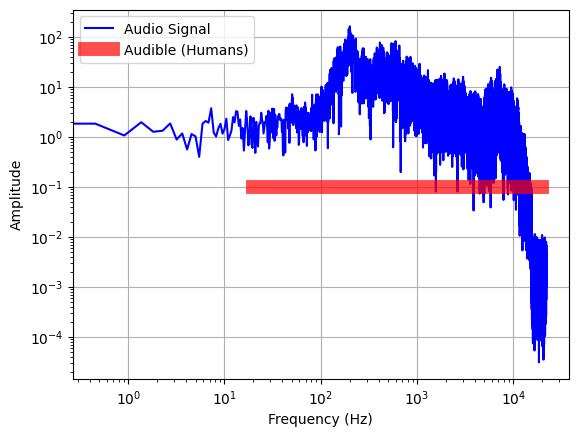

In [25]:
# analyze entire audio clip
na = len(a)
a_k = np.fft.fft(a)[0:int(na/2)]/na  # FFT function from numpy
a_k[1:] = 2*a_k[1:]  # single-sided spectrum only
Pxx = np.abs(a_k)   # remove imaginary part
f = s*np.arange((na/2))/na  # frequency vector

# plotting
fig, ax = plt.subplots()
plt.plot(f, Pxx, 'b-', label='Audio Signal')
plt.plot([20, 20000], [0.1, 0.1], 'r-', alpha=0.7,
         linewidth=10, label='Audible (Humans)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.grid()
plt.legend()
plt.ylabel('Amplitude')
plt.xlabel('Frequency (Hz)')
plt.show()

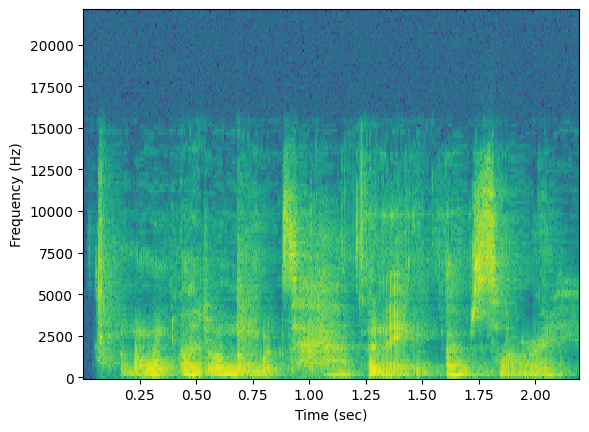

In [26]:
fr, tm, spgram = signal.spectrogram(a, s)
lspg = np.log(spgram)
plt.pcolormesh(tm, fr, lspg, shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

Features for Machine Learning

Now that the audio data is imported and analyzed for frequency content, it may be desireable to create features for machine learning regression or classification. All frequencies within the auditory range (20 Hz-20 kHz) may be too many.


Bin the Frequencies

A clustering approach uses bins to aggregate the frequency power between specified limits.


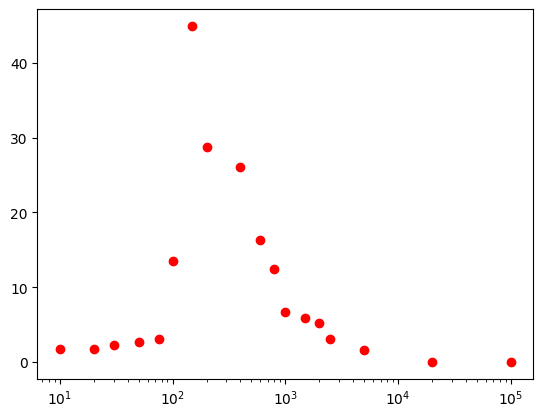

In [27]:
# bin the frequencies for machine learning features
fb = np.array([0, 10, 20, 30, 50, 75, 100, 150, 200, 400, 600,
               800, 1000, 1500, 2000, 2500, 5000, 20000, 100000])
Pb = np.zeros(len(fb))
nb = np.zeros(len(fb))
ibin = 0
n = 0
for i in range(len(f)):
    if f[i] > fb[ibin+1]:
        ibin += 1
    nb[ibin] += 1
    Pb[ibin] += Pxx[i]
for i in range(len(fb)):
    if nb[i] == 0:
        nb[i] = 1
    Pb[i] = Pb[i]/nb[i]
fig, ax = plt.subplots()
plt.semilogx(fb, Pb, 'ro', linewidth=1)

Peak Frequency


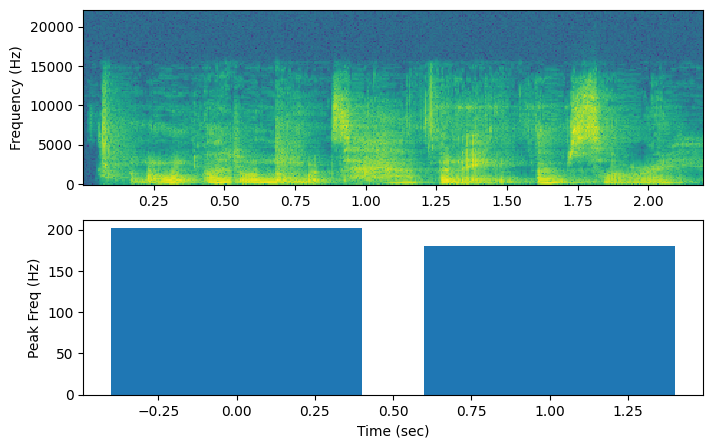

In [28]:
# analyze each sec of audio clip
nsec = int(np.floor(la))
pf = np.empty(nsec)
for i in range(nsec):
    audio = a[i*s:(i+1)*s]
    na = len(audio)  # use 48000 points with 48kHz
    a_k = np.fft.fft(audio)[0:int(na/2)]/na
    a_k[1:] = 2*a_k[1:]
    Pxx = np.abs(a_k)
    f = s*np.arange((na/2))/na
    ipf = np.argmax(Pxx)
    pf[i] = f[ipf]

plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 1)
plt.pcolormesh(tm, fr, lspg, shading='auto')
plt.ylabel('Frequency (Hz)')
plt.subplot(2, 1, 2)
tb = np.arange(0, nsec)
plt.bar(tb, pf)
plt.xlabel('Time (sec)')
plt.ylabel('Peak Freq (Hz)')
plt.show()